##Paqueterias a usar en el analisis de la base Fuel consumption

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

##Carga de la base de datos

In [ ]:
DATOS=pd.read_csv("/content/FuelConsumption.csv")
DATOS

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


#Grafico de los datos

Grafico las variables 'ENGINESIZE', 'FUELCOMSUMPTION_CITY' y 'CO2EMISSIONS' para poder visualizar todos los datos y observar si existe alguna relacion y si la hay, como es esta.

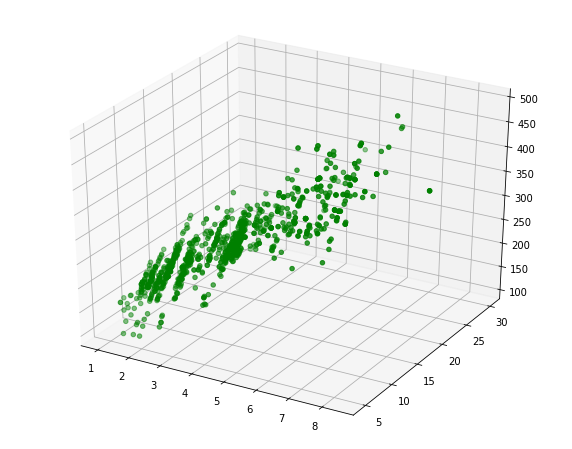

In [ ]:
G = plt.figure(figsize = (10,8))
ax = plt.axes(projection = '3d')
ax.scatter3D(DATOS['ENGINESIZE'],DATOS['FUELCONSUMPTION_CITY'],DATOS['CO2EMISSIONS'],color = 'green')

Observaciones de la relación: Podemos ver que en cuanto mayor sea el 'ENGINESIZE', más será el 'FUELCONSUMPTION_CITY' y también 'CO2EMISSIONS', por lo tanto 'ENGINESIZE' y 'FUELCONSUMPTION_CITY' afectan directamente a la variable 'CO2EMISSIONS'.

#Tratamiento de los datos para la Regresion Lineal

Comienzo con los data frames para hacer la regresion lineal con los datos.

('ENGINESIZE','FUELCONSUMPTION' y 'CO2EMISSIONS')

In [ ]:
DATOS_X_Y = DATOS[['ENGINESIZE','FUELCONSUMPTION_CITY']].values; DATOS_Z = DATOS['CO2EMISSIONS'] #tomo las series del DF

In [ ]:
DATOS_X_Y_train, DATOS_X_Y_test, DATOS_Z_train, DATOS_Z_test = train_test_split( DATOS_X_Y, DATOS_Z,
                                                                                 test_size=0.2,
                                                                                 random_state=5)    #divide el porcentaje de entrenamiento y de prueba

#Entrenamiento de la regresión lineal


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(DATOS_X_Y_train, DATOS_Z_train)

LinearRegression()

#Preparacion de los datos para su graficacion y graficacion, junto con la Regresion Lineal

Concateno los datos y los pongo en dos data frames para facilitar la legibilidad en el codigo del grafico.
DATOS_TRAIN y DATOS_TEST

In [ ]:
DATOS_TRAIN=pd.concat([pd.DataFrame(DATOS_X_Y_train),pd.DataFrame(DATOS_Z_train)],axis=1)
DATOS_TRAIN.index=range(DATOS_TRAIN.shape[0])
D_TRAIN=DATOS_TRAIN.sample(n=450)

DATOS_TEST=pd.concat([pd.DataFrame(DATOS_X_Y_test),pd.DataFrame(DATOS_Z_test)],axis=1)
DATOS_TEST.index=range(DATOS_TEST.shape[0])

Grafico los datos:

-Regresion lineal (La malla que se observa en el grafico)

-Una muestra de los datos de entrenamiento (Train Set); para facilitar la visualizacion

-Los datos de prueba (Test Set)

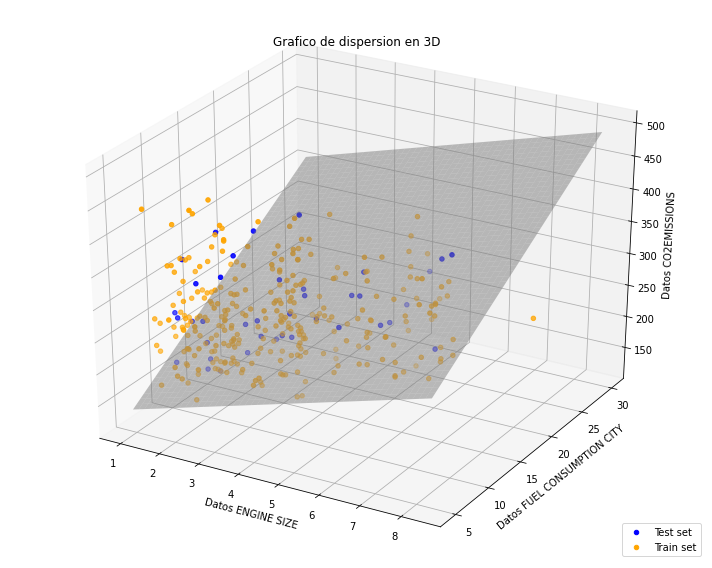

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = plt.axes(projection = '3d')
#ax.scatter3D(DATOS['ENGINESIZE'],DATOS['FUELCONSUMPTION_CITY'],DATOS['CO2EMISSIONS'],color = 'green',label='Datos') #PUNTOS

ax.scatter3D(DATOS_TEST[0],DATOS_TEST[1],DATOS_TEST['CO2EMISSIONS'],color='blue')
ax.scatter3D(D_TRAIN[0],D_TRAIN[1],D_TRAIN['CO2EMISSIONS'],color='orange')

#RECTA DE REGRESION EN 3D
x_1_graf, x_2_graf = np.linspace(min(DATOS['ENGINESIZE']),max(DATOS['ENGINESIZE'])), np.linspace(min(DATOS['FUELCONSUMPTION_CITY']),max(DATOS['FUELCONSUMPTION_CITY'])) #MALLA DEL PLANO
X,Y = np.meshgrid(x_1_graf,x_2_graf) #MALLA DEL PLANO
Z = regr.intercept_+regr.coef_[0]*X + regr.coef_[1]*Y
ax.plot_surface(X,Y,Z,alpha = 0.5, color='grey',label='Regresión')

#CARACTERISTICAS DEL GRAFICO
plt.title('Grafico de dispersion en 3D')
plt.xlabel('Datos ENGINE SIZE')
plt.ylabel('Datos FUEL CONSUMPTION CITY')
ax.legend(['Test set', 'Train set'],loc=4,fontsize='medium',numpoints=2)
ax.set_zlabel('Datos CO2EMISSIONS')

plt.tight_layout()


#Prueba de Hipotesis (ANOVA)

##Creacion de funciones para el analisis ANOVA

Creacion de funciones para las pruebas de hipotesis ANOVA.
Codigo obtenido de Analisis_Datos_Python.ipynb , por Joaquin Desiderio López de la Cruz.

In [ ]:
def M_H (Data_X):
    '''
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.
    '''
    import pandas as pd
    import numpy as np
    Transpuesta = Data_X.transpose()
    A_ = pd.DataFrame(np.dot(Transpuesta,Data_X))
    A = pd.DataFrame(np.linalg.inv(A_))
    return pd.DataFrame(np.dot(np.dot(Data_X,A),Transpuesta))

def SSTO (Data_Y):
    '''
    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.

             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'

             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    import pandas as pd
    import numpy as np
    n = len(Data_Y.index)
    M_I = pd.DataFrame(np.diagflat(list(1 for i in range (n))))
    M_1 = pd.DataFrame(np.ones((n,n)))
    Transpuesta = Data_Y.transpose()
    A = M_I - (1/n)*M_1
    return float(np.dot(np.dot(Transpuesta,A),Data_Y))

def SSE (Data_X,Data_Y):
    '''
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.

    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.

             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'

             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    import pandas as pd
    import numpy as np
    H = M_H(Data_X)
    M_I = pd.DataFrame(np.diagflat(list(1 for i in range (len(H.index)))))
    Transpuesta = Data_Y.transpose()
    A = M_I - H
    return float(np.dot(np.dot(Transpuesta,A),Data_Y))

def SSR (Data_X,Data_Y):
    '''
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.

    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.

             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'

             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    import pandas as pd
    import numpy as np
    n = len(Data_Y.index)
    H = M_H(Data_X)
    M_1 = pd.DataFrame(np.ones((n,n)))
    Transpuesta = Data_Y.transpose()
    A = H - (1/n)*M_1
    return float(np.dot(np.dot(Transpuesta,A),Data_Y))


def ANOVA_RLM (Alpha,Data_X,Data_Y):
    '''
    Alpha : Es la probabilidad deseada.

    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.

    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.

             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'

             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    from scipy.stats import f
    import pandas as pd
    import numpy as np
    Data_X['1'] = 1
    n = len(Data_Y.index)
    p_1 = len(Data_X.columns)-1
    n_p = (n-1)-p_1
    ssr = SSR(Data_X,Data_Y)
    sse = SSE(Data_X,Data_Y)
    ssto = SSTO(Data_Y)
    msr = ssr/p_1
    mse = sse/n_p
    Estadistico_Prueba = msr/mse
    Critico = f.isf(Alpha,p_1,n_p)
    return [pd.DataFrame({'SS':[ssr,sse,ssto],'GL':[p_1,n_p,n-1],
            'MS':[msr,mse,np.nan],
            'Estadistico de Prueba':[Estadistico_Prueba,np.nan,np.nan],
            'Valor Critico':[Critico,np.nan,np.nan]},index = ['Regresion','Error','Total']),Estadistico_Prueba>Critico]

##Prueba ANOVA

In [ ]:
ANOVA_RLM(0.05,DATOS[['ENGINESIZE','FUELCONSUMPTION_CITY']],DATOS['CO2EMISSIONS'])[0]   #to_frame para pasar una serie a un dataframe nuevamente

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SS,GL,MS,Estadistico de Prueba,Valor Critico
Regresion,3.676461e+06,2,1.838231e+06,3234.74236,3.004183
Error,6.046470e+05,1064,5.682773e+02,NaN,NaN
Total,4.281108e+06,1066,NaN,NaN,NaN


In [ ]:
ANOVA_RLM(0.05,DATOS[['ENGINESIZE','FUELCONSUMPTION_CITY']],DATOS['CO2EMISSIONS'])[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


True

##Conclusiones

Se rechaza la hipótesis nula de la regresion lineal multiple, entonces b1=b2=....=0.

Cuando vas agregando mas variables menos error hay, por lo tanto si existe relacion entre las variables.

Si vale el ezfuerzo hacer el analisis con una regresión lineal multiple.

Análisis hecho por Natalia Jireh Valles Campusano.